In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Callable, Tuple

from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import utils

### Geenrate data sample

In [3]:
np.random.seed(42)

ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50, 0.8, 0.015])

ar2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

### Plot your simulated autoregressive process

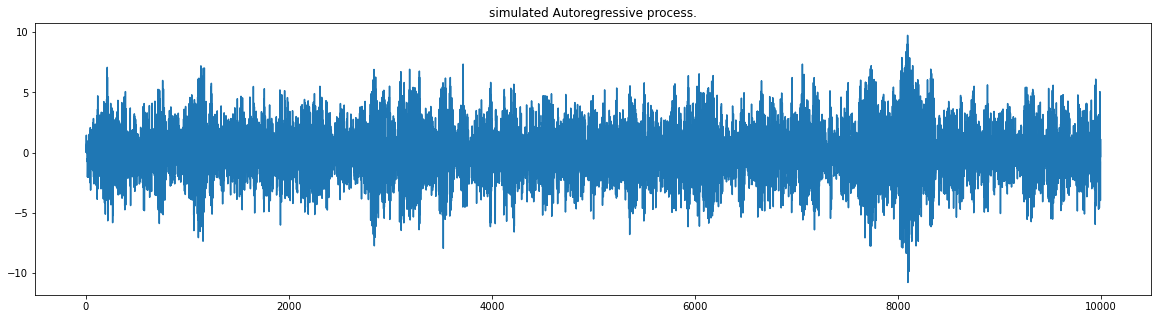

In [4]:
plt.figure(figsize=(20,5))
plt.plot(ar2_process);
plt.title('simulated Autoregressive process.')
plt.show();

### Stationarity test

In [5]:
adf_test = adfuller(ar2_process)
print('Stationary' if adf_test[1] < 0.05 else 'Non-stationary')

Stationary


### Plot acf and pacf

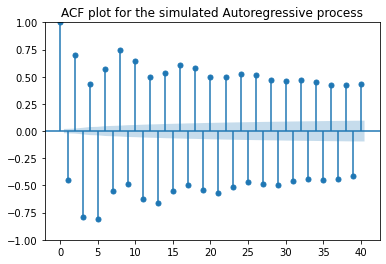

In [6]:
plot_acf(ar2_process, title='ACF plot for the simulated Autoregressive process')
plt.show() 

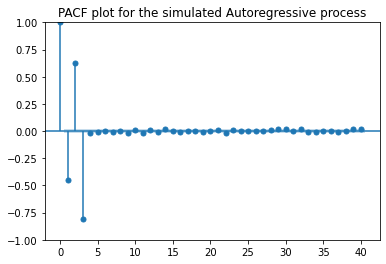

In [7]:
plot_pacf(ar2_process, title='PACF plot for the simulated Autoregressive process', method='ywm')
plt.show() 

### 6 Separate your simulated series into train and test sets. Take the first 9500 timesteps for the train set and assign the rest to the test set.

In [8]:
horizon_n = 500
train = ar2_process[:-horizon_n]
test = ar2_process[-horizon_n:]

print(train.shape, test.shape)

(9500,) (500,)


### 7 Make forecasts over the test set. Use the historical mean method, last known value method, and an AR(2) model. Use the rolling_forecast function, and use a window length of 2.

In [9]:
def ar_predict_function(arr, arma_order, window):
    arima = ARIMA(arr, order=arma_order)
    fit = arima.fit()
    return fit.get_forecast(steps=window).predicted_mean

total_len = len(ar2_process)
train_len = len(train)
arma_order = (4, 0, 0)
window = 4

predict_mean = utils.np_rolling_forecast(ar2_process, total_len, train_len, window, 'mean')
predict_last = utils.np_rolling_forecast(ar2_process, total_len, train_len, window, 'last')
predict_arma = utils.np_rolling_forecast(ar2_process, total_len, train_len, window, 'arma', arma_order, ar_predict_function)

### 8 Plot your forecasts.

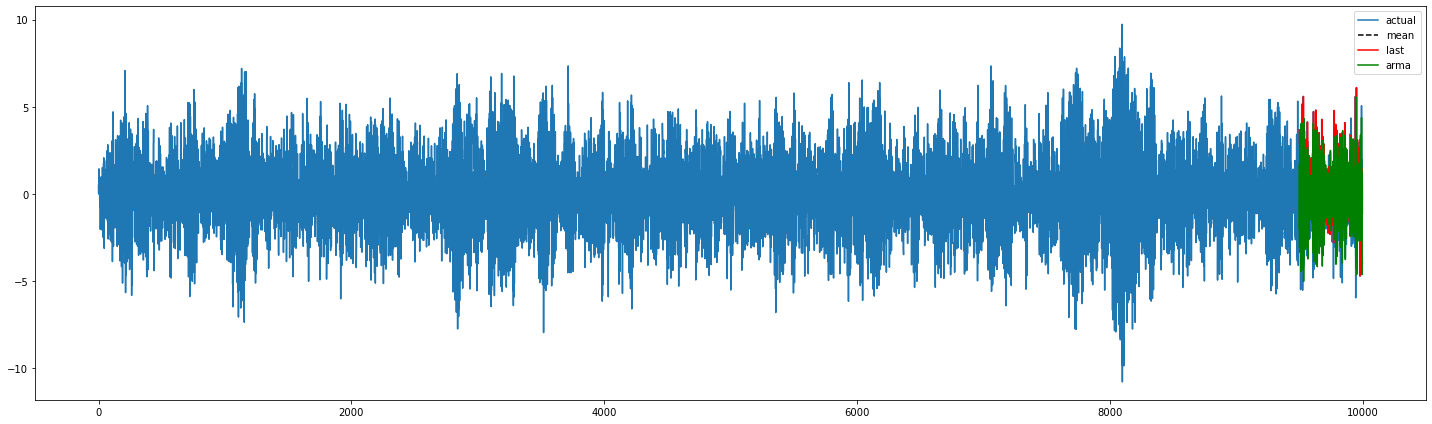

In [10]:
fig, ax = plt.subplots(figsize=(20,6))

blank_train = np.repeat(np.nan, train_len)

ax.plot(ar2_process, label='actual')
ax.plot(np.hstack((blank_train, predict_mean)), 'k--', label='mean')
ax.plot(np.hstack((blank_train, predict_last)), 'r-', label='last')
ax.plot(np.hstack((blank_train, predict_arma)), 'g',  label='arma')

ax.legend()

plt.tight_layout()
plt.show()

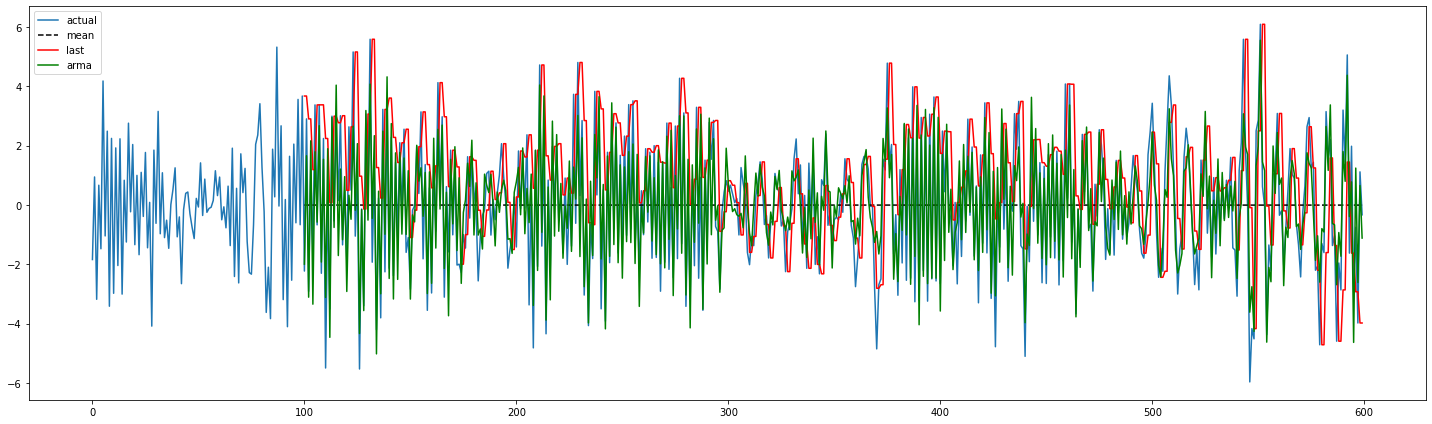

In [12]:
fig, ax = plt.subplots(figsize=(20,6))

blank_train = np.repeat(np.nan, train_len)

ax.plot(ar2_process[-600:], label='actual')
ax.plot(np.hstack((blank_train, predict_mean))[-600:], 'k--', label='mean')
ax.plot(np.hstack((blank_train, predict_last))[-600:], 'r-', label='last')
ax.plot(np.hstack((blank_train, predict_arma))[-600:], 'g',  label='arma')

ax.legend(loc=2)

plt.tight_layout()
plt.show()

### 9 Measure the MSE, and identify your champion model.

In [13]:
mse_mean = mean_squared_error(test, predict_mean)
mse_last = mean_squared_error(test, predict_last)
mse_arma = mean_squared_error(test, predict_arma)

print(mse_mean, mse_last, mse_arma)

4.49718161984185 7.438108844962862 1.0099984190433084


### 10 Plot your MSEs in a bar plot.

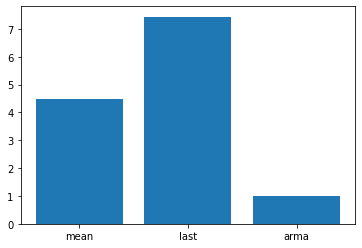

In [14]:
plt.bar(['mean', 'last', 'arma'], [mse_mean, mse_last, mse_arma]);